In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_excel(r"C:\Users\shilp\Downloads\sales.xlsx",engine="openpyxl")
print(df)

        transaction_id transaction_date transaction_time  store_id  \
0               114301       2023-06-01         11:33:29         3   
1               115405       2023-06-02         11:18:24         3   
2               115478       2023-06-02         12:02:45         3   
3               116288       2023-06-02         19:39:47         3   
4               116714       2023-06-03         12:24:57         3   
...                ...              ...              ...       ...   
149111          129465       2023-06-14         08:34:10         5   
149112          133523       2023-06-17         09:55:47         8   
149113          133674       2023-06-17         10:41:11         8   
149114          133744       2023-06-17         11:18:31         8   
149115          149043       2023-06-30         11:18:31         8   

         store_location  product_id  transaction_qty  unit_price  \
0               Astoria          45                1        3.00   
1               Astoria

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   store_id          149116 non-null  int64         
 4   store_location    149116 non-null  object        
 5   product_id        149116 non-null  int64         
 6   transaction_qty   149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
 11  Size              149116 non-null  object        
 12  total_bill        149116 non-null  float64       
 13  Month Name        149116 non-null  object        
 14  Day 

In [7]:
df.describe()

,transaction_id,transaction_date,store_id,product_id,transaction_qty,unit_price,total_bill,Hour,Month,Day of Week
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.00000
mean,74737.371872,2023-04-15 11:50:32.173609984,5.342063,47.918607,1.438276,3.382219,4.686367,11.735790,3.988881,2.99202
min,1.000000,2023-01-01 00:00:00,3.000000,1.000000,1.000000,0.800000,0.800000,6.000000,1.000000,0.00000
25%,37335.750000,2023-03-06 00:00:00,3.000000,33.000000,1.000000,2.500000,3.000000,9.000000,3.000000,1.00000
50%,74727.500000,2023-04-24 00:00:00,5.000000,47.000000,1.000000,3.000000,3.750000,11.000000,4.000000,3.00000
75%,112094.250000,2023-05-30 00:00:00,8.000000,60.000000,2.000000,3.750000,6.000000,15.000000,5.000000,5.00000
max,149456.000000,2023-06-30 00:00:00,8.000000,87.000000,8.000000,45.000000,360.000000,20.000000,6.000000,6.00000
std,43153.600016,NaN,2.074241,17.930020,0.542509,2.658723,4.227099,3.764662,1.673091,1.99028


In [8]:
# Count missing values in each column
df.isnull().sum()


transaction_id      0
transaction_date    0
transaction_time    0
store_id            0
store_location      0
product_id          0
transaction_qty     0
unit_price          0
product_category    0
product_type        0
product_detail      0
Size                0
total_bill          0
Month Name          0
Day Name            0
Hour                0
Month               0
Day of Week         0
dtype: int64

In [10]:
# Check for duplicates
df.duplicated().sum()

# Remove duplicates
df.drop_duplicates(inplace=True)

# Confirm removal
df.duplicated().sum()


np.int64(0)

In [14]:
print(df.columns)

Index(['transaction_id', 'transaction_date', 'transaction_time', 'store_id',
       'store_location', 'product_id', 'transaction_qty', 'unit_price',
       'product_category', 'product_type', 'product_detail', 'Size',
       'total_bill', 'Month Name', 'Day Name', 'Hour', 'Month', 'Day of Week'],
      dtype='object')


In [17]:
df['transaction_date'] = pd.to_datetime(df['transaction_date']).dt.strftime('%Y-%m-%d ')

# Display the updated DataFrame
print(df.head())

   transaction_id transaction_date transaction_time  store_id store_location  \
0          114301       2023-06-01         11:33:29         3        Astoria   
1          115405       2023-06-02         11:18:24         3        Astoria   
2          115478       2023-06-02         12:02:45         3        Astoria   
3          116288       2023-06-02         19:39:47         3        Astoria   
4          116714       2023-06-03         12:24:57         3        Astoria   

   product_id  transaction_qty  unit_price product_category  \
0          45                1         3.0              Tea   
1          45                1         3.0              Tea   
2          45                1         3.0              Tea   
3          45                1         3.0              Tea   
4          45                1         3.0              Tea   

        product_type product_detail   Size  total_bill Month Name  Day Name  \
0  Brewed herbal tea     Peppermint  Large         3.0       

In [22]:
total_sales = df['total_bill'].sum()
print(f"Total Sales: {total_sales:.2f}")




Total Sales: 698812.33


In [23]:
# Calculate total quantity sold
total_quantity = df['transaction_qty'].sum()

# Count distinct Transaction IDs
distinct_transactions = df['transaction_id'].nunique()

# Compute Average Order Value
average_order = total_quantity / distinct_transactions

print(f"Average Order Value: {average_order:.2f}")


Average Order Value: 1.44


In [24]:
# Ensure 'Total Bill' is calculated
df['total_bill'] = df['unit_price'] * df['transaction_id']

# Calculate total bill sum
total_bill_sum = df['total_bill'].sum()

# Count distinct Transaction IDs
distinct_transactions = df['transaction_id'].nunique()

# Compute Average Bill
average_bill = total_bill_sum / distinct_transactions

print(f"Average Bill Amount: {average_bill:.2f}")


Average Bill Amount: 252874.09


In [25]:
# Count distinct Transaction IDs to get footfall
footfall = df['transaction_id'].nunique()

print(f"Total Footfall: {footfall}")


Total Footfall: 149116


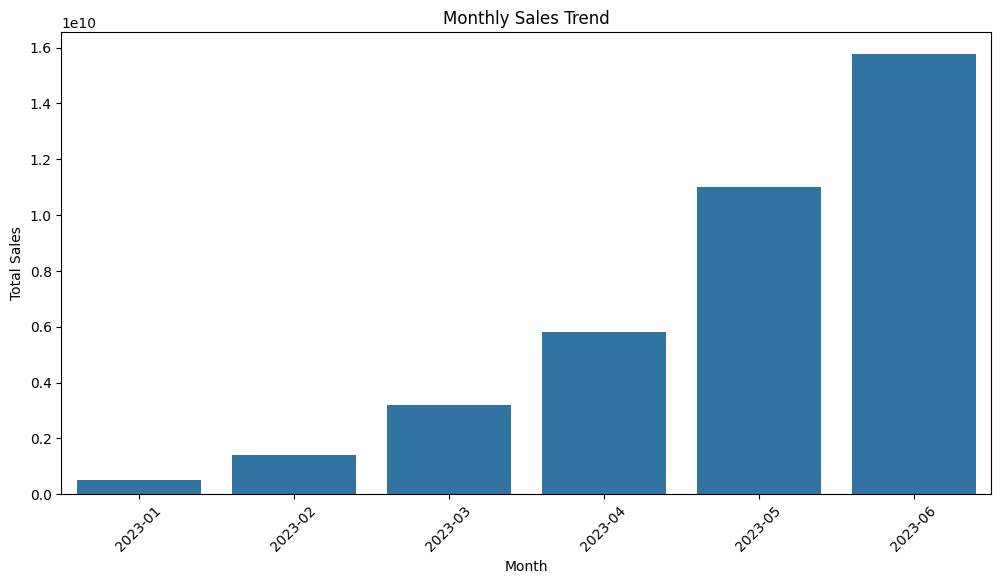

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure transaction_date is in datetime format
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Extract month from transaction_date
df['month'] = df['transaction_date'].dt.strftime('%Y-%m')

# Group by month and calculate total sales
monthly_sales = df.groupby('month')['total_bill'].sum()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


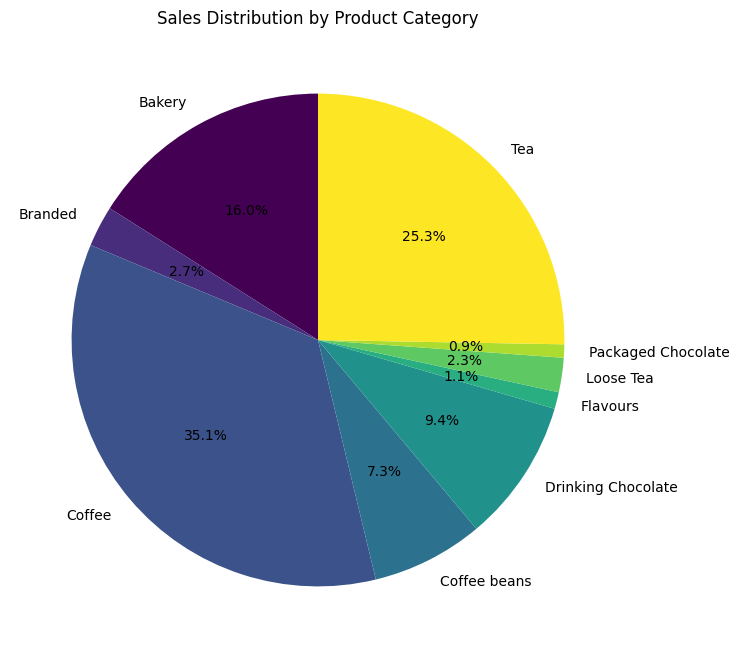

In [28]:
# Group by product category and calculate total sales
category_sales = df.groupby('product_category')['total_bill'].sum()

# Plot
plt.figure(figsize=(8,8))
category_sales.plot(kind='pie', autopct='%1.1f%%', cmap='viridis', startangle=90)
plt.title("Sales Distribution by Product Category")
plt.ylabel("")
plt.show()


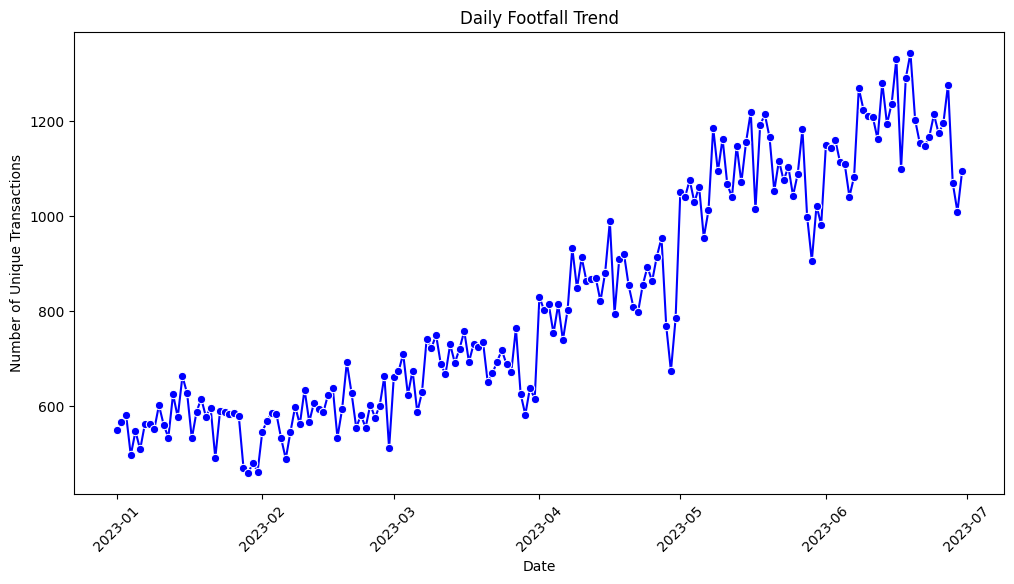

In [29]:
# Count distinct transactions per day
daily_footfall = df.groupby(df['transaction_date'].dt.date)['transaction_id'].nunique()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(x=daily_footfall.index, y=daily_footfall.values, marker="o", color='b')
plt.xticks(rotation=45)
plt.title("Daily Footfall Trend")
plt.xlabel("Date")
plt.ylabel("Number of Unique Transactions")
plt.show()


C:\Users\shilp\AppData\Local\Temp\ipykernel_11220\3807994428.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_sales.index, y=hourly_sales.values, palette="coolwarm")


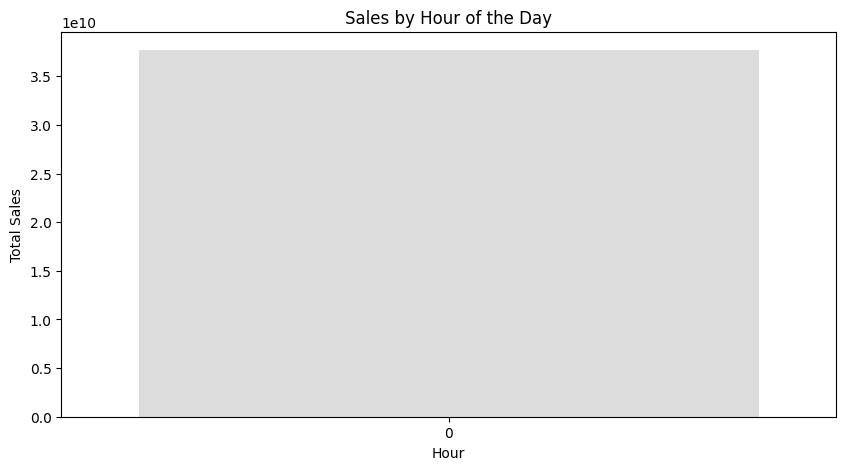

In [30]:
# Extract hour from transaction_date
df['hour'] = df['transaction_date'].dt.hour

# Group by hour and calculate total sales
hourly_sales = df.groupby('hour')['total_bill'].sum()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=hourly_sales.index, y=hourly_sales.values, palette="coolwarm")
plt.title("Sales by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Total Sales")
plt.show()


C:\Users\shilp\AppData\Local\Temp\ipykernel_11220\729736317.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="magma")


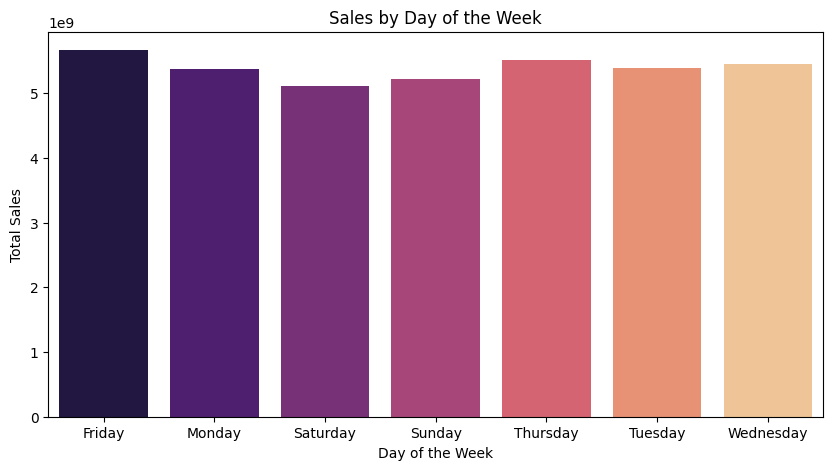

In [31]:
# Extract day name from transaction_date
df['day_name'] = df['transaction_date'].dt.day_name()

# Group by day and calculate total sales
weekday_sales = df.groupby('day_name')['total_bill'].sum()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="magma")
plt.title("Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")
plt.show()


C:\Users\shilp\AppData\Local\Temp\ipykernel_11220\1874935672.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


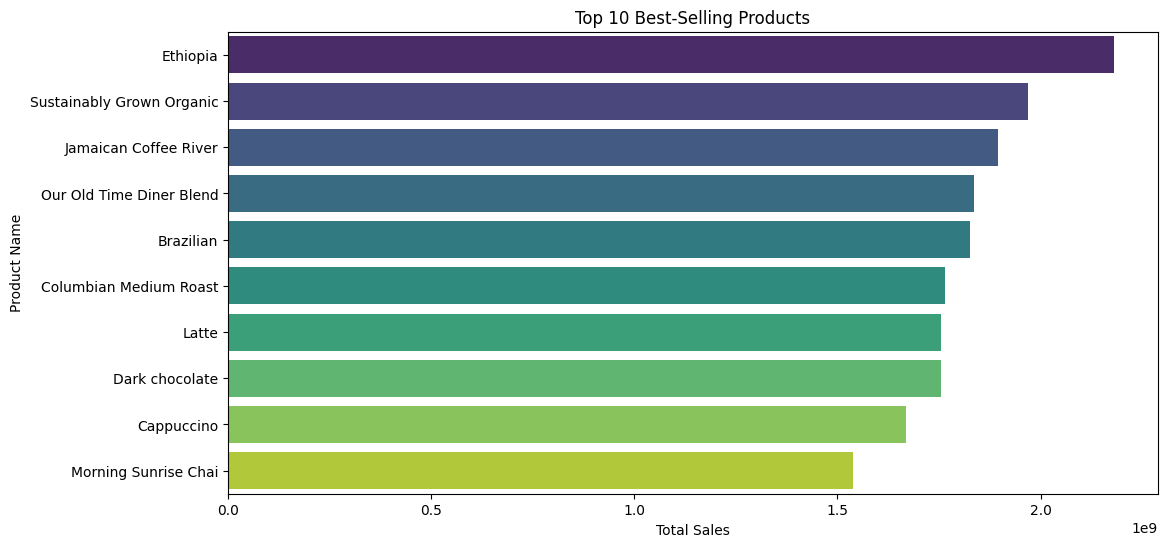

In [32]:
# Group by product and calculate total sales
top_products = df.groupby('product_detail')['total_bill'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.show()


C:\Users\shilp\AppData\Local\Temp\ipykernel_11220\3960721206.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_sales.index, y=location_sales.values, palette="coolwarm")


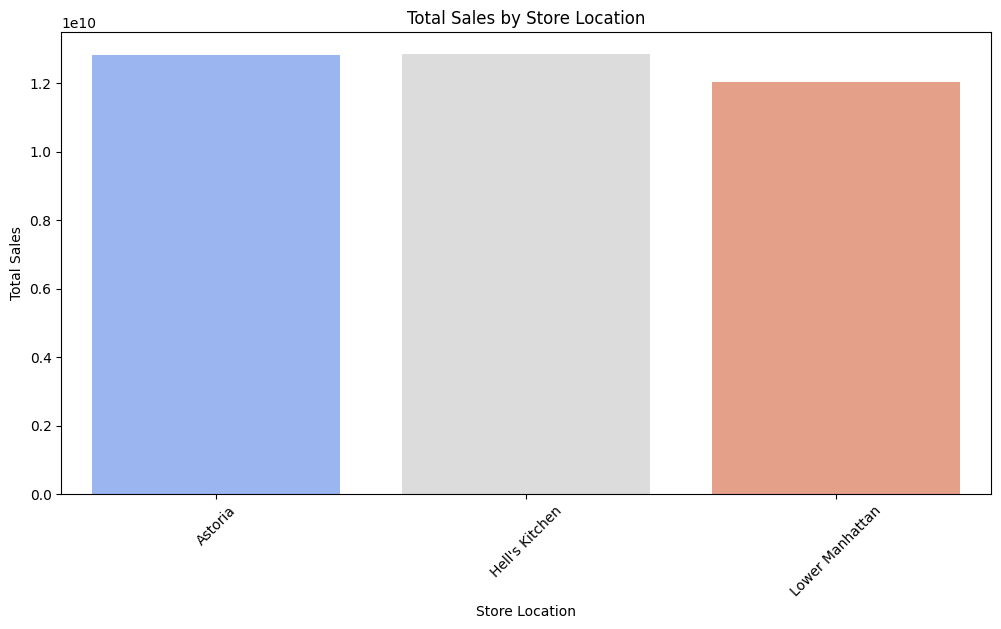

In [33]:
# Group by store location and calculate total sales
location_sales = df.groupby('store_location')['total_bill'].sum()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=location_sales.index, y=location_sales.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Total Sales by Store Location")
plt.xlabel("Store Location")
plt.ylabel("Total Sales")
plt.show()


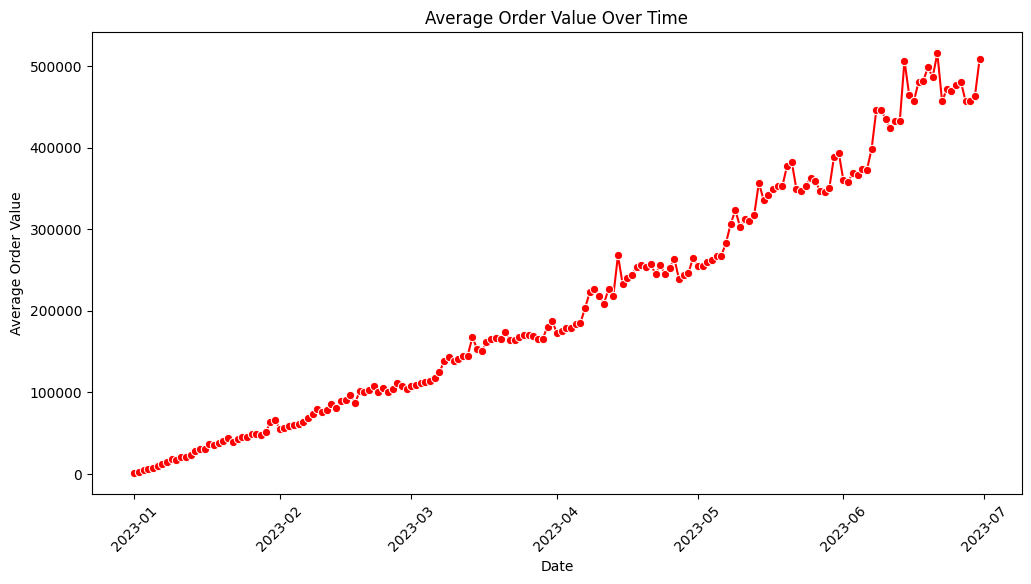

In [34]:
# Compute daily average order value
daily_aov = df.groupby(df['transaction_date'].dt.date)['total_bill'].mean()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(x=daily_aov.index, y=daily_aov.values, marker="o", color='r')
plt.xticks(rotation=45)
plt.title("Average Order Value Over Time")
plt.xlabel("Date")
plt.ylabel("Average Order Value")
plt.show()


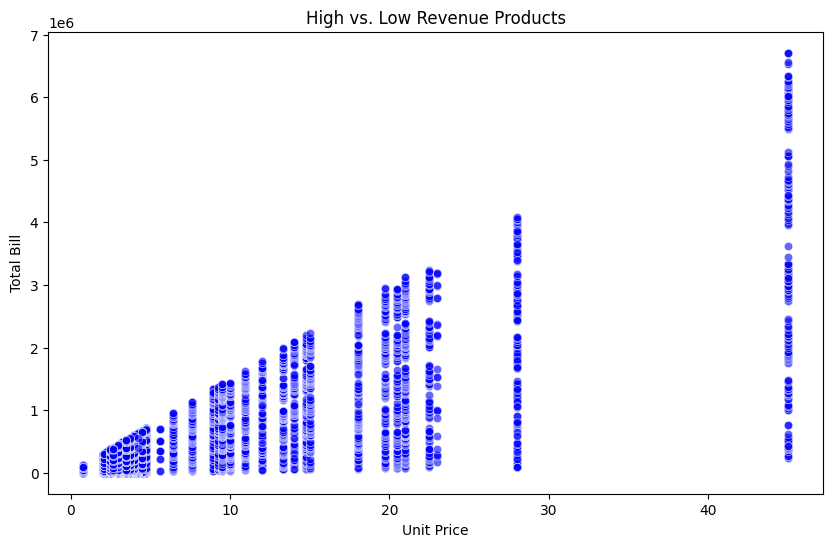

In [36]:
# Scatter plot for unit price vs. total bill
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['unit_price'], y=df['total_bill'], alpha=0.6, color="blue")
plt.title("High vs. Low Revenue Products")
plt.xlabel("Unit Price")
plt.ylabel("Total Bill")
plt.show()

